In [2]:
import os
import numpy as np
from numpy.random import default_rng
import sys
sys.path.append(r"C:\Users\user\Desktop\prog\spec-line3\pfy")
from pyfitit.ihs import ihs

import random
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# скорость 1
v1_s = 1
v1_e = 3
v1_d = 0.1
# скорость 2
v2 = 2
# скорость 3
v3_s = 1
v3_e = 3
v3_d = 0.1
# cost скорость потока реагентов
vs = 6
# const скорость масла
v4m = 2

In [4]:
time_point = 60
time_proliv = 30
zero_str = (0, 0, 0, 0, None, None, 1)
proliv = (0, 0, 0, vs + v4m, None, None, time_proliv)
start_str = (0, 0, 0, vs + v4m, None, None, 30)
end_str = (0, 0, 0, vs + v4m, None, None, 600)
sosiska=(2, 2, 2, 0, None, None, time_point)

для фикса

In [5]:
table = []
for v1 in np.arange(v1_s, v1_e + 0.1, v1_d):
    for v3 in np.arange(v3_s, v3_e + 0.1, v3_d):
        if v1 + v2 + v3 == vs:
            table.append(
                (v1, v2, v3, v4m, None, None, time_point, 1, v1 + v2 + v3 + v4m)
            )
        else:
            continue

для рандома ihs

2


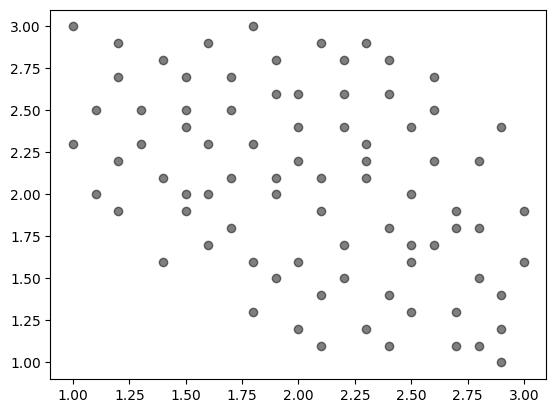

In [31]:
n = 100
total_flow = vs + v4m
au = v2
bounds = [(v1_s, v1_e), (v3_s, v3_e)]
res = ihs(2, n, seed=random.seed())
samples = []
# x4 = (0.3 - 0.6) flow
# x1 = (0 - 0.9)(flow - x3 - x4)
# x2 = flow - x3 - x4 - x1
# x3 = (0.1 - 0.9)(flow - x4)
for row in res:
    r = []
    for i, interval in zip(range(len(row)), bounds):
        r.append(interval[0] + (row[i] * 1.0 / n) * (interval[1] - interval[0]))
    samples.append(r)
real_values = []

for s in samples:
    x1 = round(s[0],1)
    x2 = au
    x3 = round(s[1],1)
    x4 = total_flow - x1 - x2 - x3
    if 0.5<x4<3:
        real_values.append([x1, x2, x3, x4])
df = pd.DataFrame(real_values)
#df = df.round(1)
#plt.scatter(df[0].values, df[2].values)
table = df.values.tolist()
print(df[1][0])
for i in range(len(df)):
    plt.scatter(df[0][i], df[2][i],alpha=0.5,color='black')

zapravka    5202.0       16
0 16
zapravka    5130.0       15
16 15
zapravka    5238.0       17
31 17
zapravka    5082.0       16
48 16
zapravka    5190.0       16
64 16
5


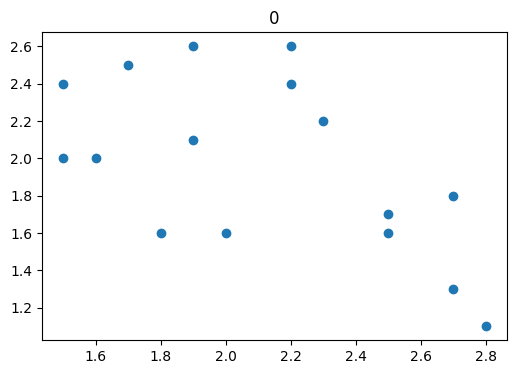

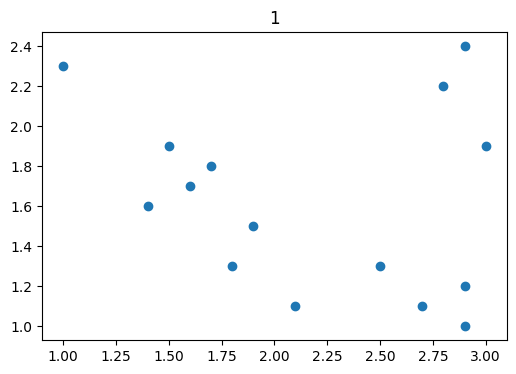

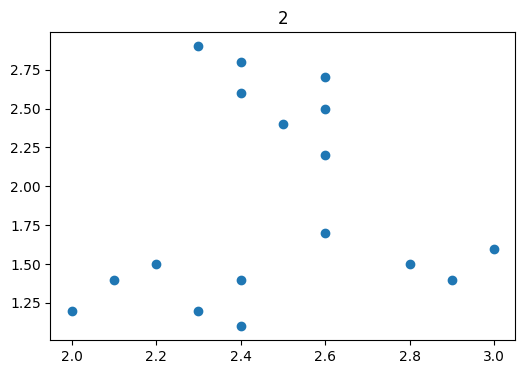

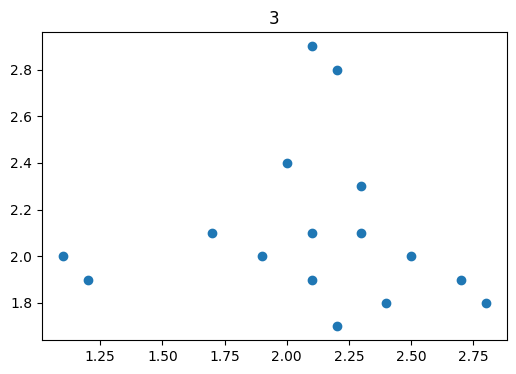

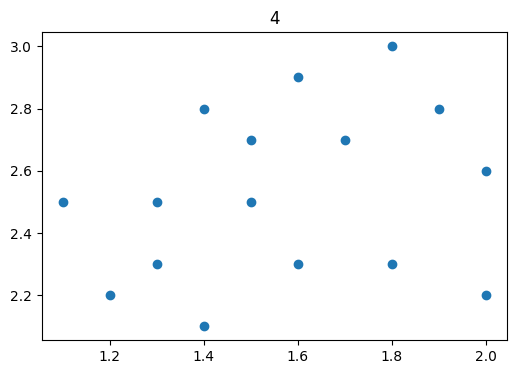

In [33]:
schedule = []
schedule.append(zero_str)
schedule.append(sosiska)
schedule.append(zero_str)
schedule.append(proliv)
schedule.append(zero_str)

vol = 0
a = 0
b=0
q=0
for i in range(len(table)):
    schedule.append([table[i][0],table[i][1],table[i][2],table[i][3],None,None,time_point])
    schedule.append(zero_str)
    schedule.append(proliv)
    schedule.append(zero_str)

    vol += table[i][3] * time_point + proliv[3] * proliv[6]
    a += 1
    if a%5==0:
        schedule.append(sosiska)
        schedule.append(zero_str)
        schedule.append(proliv)
        schedule.append(zero_str)
    if vol > 5000:
        print("zapravka   " , vol,"     ",a)
        vol=0
        plt.figure(figsize=(6, 4))
        plt.scatter(df[0][q:q+a],df[2][q:q+a])
        plt.title(b)
        print(q,a)
        q+=a
        a=0

        schedule.append(end_str)
        data = pd.DataFrame(schedule)
        data = data.assign(q=np.ones(len(schedule)))
        data = data.assign(time=np.arange(2, len(schedule) + 2))
        data.to_excel("расписание"+str(b)+".xlsx", index=False, header=False)
        
        b+=1

        schedule = []
        schedule.append(zero_str)
        schedule.append(sosiska)
        schedule.append(zero_str)
        schedule.append(proliv)
        schedule.append(zero_str)

print(b)